In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
# scipi is a library for statistical tests and visualizations 
from scipy import stats
# random enables us to generate random numbers
import random


In [2]:
# Now that the files are saved, we want to load them into Python using read_csv and pandas.

# Create a variable called google, and store in it the path of the csv file that contains your google dataset. 
# If your dataset is in the same folder as this notebook, the path will simply be the name of the file. 
from pathlib import Path

google=Path(r"C:\Users\halis\Downloads\googleplaystore.csv")

# Read the csv file into a data frame called Google using the read_csv() pandas method.
Google=pd.read_csv(google)

# Using the head() pandas method, observe the first three entries.
Google.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [3]:
# Create a variable called apple, and store in it the path of the csv file that contains your apple dataset. 
apple = Path(r"C:\Users\halis\Downloads\AppleStore.csv")

# Read the csv file into a pandas DataFrame object called Apple.
Apple = pd.read_csv(apple)

# Observe the first three entries like you did with your other data. 
Apple.head(3)

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1


In [4]:
# Subset our DataFrame object Google by selecting just the variables ['Category', 'Rating', 'Reviews', 'Price']
Google=Google[['Category', 'Rating', 'Reviews', 'Price']]

# Check the first three entries
Google.head(3)

,Category,Rating,Reviews,Price
0,ART_AND_DESIGN,4.1,159,0
1,ART_AND_DESIGN,3.9,967,0
2,ART_AND_DESIGN,4.7,87510,0


In [5]:
# Do the same with our Apple object, selecting just the variables ['prime_genre', 'user_rating', 'rating_count_tot', 'price']
Apple = Apple[['prime_genre', 'user_rating', 'rating_count_tot', 'price']]

# Let's check the first three entries
Apple.head(3)

,prime_genre,user_rating,rating_count_tot,price
0,Games,4.0,21292,3.99
1,Productivity,4.0,161065,0.00
2,Weather,3.5,188583,0.00


In [6]:
# Using the dtypes feature of pandas DataFrame objects, check out the data types within our Apple dataframe.
# Are they what you expect?
Apple.dtypes

prime_genre          object
user_rating         float64
rating_count_tot      int64
price               float64
dtype: object

In [7]:
# Using the same dtypes feature, check out the data types of our Google dataframe. 
Google.dtypes

Category     object
Rating      float64
Reviews      object
Price        object
dtype: object

In [8]:
# Use the unique() pandas method on the Price column to check its unique values. 
Google['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', 'Everyone', '$1.20', '$1.04'], dtype=object)

In [9]:
# Let's check which data points have the value 'Everyone' for the 'Price' column by subsetting our Google dataframe.

# Subset the Google dataframe on the price column. 
# To be sure: you want to pick out just those rows whose value for the 'Price' column is just 'Everyone'. 
Google[Google.Price =='Everyone']

,Category,Rating,Reviews,Price
10472,1.9,19.0,3.0M,Everyone


In [10]:
# Let's eliminate that row. 

# Subset our Google dataframe to pick out just those rows whose value for the 'Price' column is NOT 'Everyone'. 
# Reassign that subset to the Google variable. 
# You can do this in two lines or one. Your choice! 
Google=Google.drop(Google.index[[10472]])

# Check again the unique values of Google
Google['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [11]:
# Let's create a variable called nosymb.
# This variable will take the Price column of Google and apply the str.replace() method. 
# Remember: we want to find '$' and replace it with nothing, so we'll have to write approrpiate arguments to the method to achieve this. 
nosymb =Google['Price'].str.replace('$','')
Google['Price'] = pd.to_numeric(nosymb)
# Now we need to do two things:
# i. Make the values in the nosymb variable numeric using the to_numeric() pandas method.
# ii. Assign this new set of numeric, dollar-sign-less values to Google['Price']. 
# You can do this in one line if you wish.


In [12]:
# Use the function dtypes. 
Google['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [13]:
# Convert the 'Reviews' column to a numeric data type. 
# Use the method pd.to_numeric(), and save the result in the same column.
Google['Reviews'] = pd.to_numeric(Google['Reviews'])

In [14]:
# Let's check the data types of Google again
Google.dtypes

Category     object
Rating      float64
Reviews       int64
Price       float64
dtype: object

In [15]:
# Create a column called 'platform' in both the Apple and Google dataframes. 
# Add the value 'apple' and the value 'google' as appropriate. 
Apple['platform'] = 'apple'
Google['platform'] = 'google'

In [16]:
# Create a variable called old_names where you'll store the column names of the Apple dataframe. 
# Use the feature .columns.
old_names = Apple.columns.values 

# Create a variable called new_names where you'll store the column names of the Google dataframe. 
new_names=Google.columns.values

# Use the rename() DataFrame method to change the columns names. 
# In the columns parameter of the rename() method, use this construction: dict(zip(old_names,new_names)).
Apple=Apple.rename(columns=dict(zip(old_names, new_names)))


In [17]:
# Let's use the append() method to append Apple to Google. 
# Make Apple the first parameter of append(), and make the second parameter just: ignore_index = True.
df = Google.append(Apple, ignore_index= True)

# Using the sample() method with the number 12 passed to it, check 12 random points of your dataset.
df.sample(n=12)


,Category,Rating,Reviews,Price,platform
17909,Games,4.0,1,0.00,apple
12119,News,4.5,373,0.00,apple
7202,FAMILY,NaN,0,0.00,google
5419,GAME,4.4,579519,0.00,google
2560,SOCIAL,4.5,76480,0.00,google
15150,Games,0.0,0,0.00,apple
921,ENTERTAINMENT,4.4,288150,0.00,google
4404,FAMILY,4.7,8600,0.00,google
14402,Games,4.5,9517,0.00,apple
15121,Education,3.0,7,2.99,apple


In [18]:
# Lets check first the dimesions of df before droping `NaN` values. Use the .shape feature. 
df.shape

# Use the dropna() method to eliminate all the NaN values, and overwrite the same dataframe with the result. 
# Note: dropna() by default removes all rows containing at least one NaN. 
df=df.dropna(how='any') 

# Check the new dimesions of our dataframe. 
df.shape


(16563, 5)

In [19]:
# Subset your df to pick out just those rows whose value for 'Reviews' is equal to 0. 
# Do a count() on the result. 
df[df['Reviews'] == 0].count()

Category    929
Rating      929
Reviews     929
Price       929
platform    929
dtype: int64

In [20]:
# Eliminate the points that have 0 reviews.
# An elegant way to do this is to assign df the result of picking out just those rows in df whose value for 'Reviews' is NOT 0.
df= df[df['Reviews'] != 0]


In [21]:
df.shape

(15634, 5)

In [22]:
df.groupby(['platform']).describe()

Rating                                              Reviews  \
           count      mean       std  min  25%  50%  75%  max   count   
platform                                                                
apple     6268.0  4.049697  0.726943  1.0  4.0  4.5  4.5  5.0  6268.0   
google    9366.0  4.191757  0.515219  1.0  4.0  4.3  4.5  5.0  9366.0   

                         ...                         Price            \
                   mean  ...       75%         max   count      mean   
platform                 ...                                           
apple      14803.805520  ...   3963.50   2974676.0  6268.0  1.821977   
google    514049.836536  ...  81532.75  78158306.0  9366.0  0.960928   

                                                  
                std  min  25%  50%   75%     max  
platform                                          
apple      6.128238  0.0  0.0  0.0  2.99  299.99  
google    15.816585  0.0  0.0  0.0  0.00  400.00  

[2 rows x 24 columns]

In [23]:
# Call the boxplot() method on our df.
# Set the parameters: by = 'platform' and column = ['Rating'].
df.boxplot(by='platform', column =['Rating'], grid = False, rot=45, fontsize=15)

In [24]:
apple=df[df['platform'] == 'apple'].loc[:,'Rating']
google=df[df['platform'] == 'google'].loc[:,'Rating']

In [25]:
apple_normal = stats.normaltest(apple)
print(apple_normal)

NormaltestResult(statistic=1778.9974234584017, pvalue=0.0)


In [26]:
# Do the same with the google data. 
# Save the result in a variable called google_normal
google_normal = stats.normaltest(google)
print(google_normal)

NormaltestResult(statistic=3678.6157187516856, pvalue=0.0)


In [27]:
import matplotlib.pyplot as plt

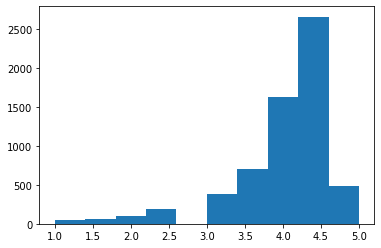

In [28]:
histoApple = plt.hist(apple)

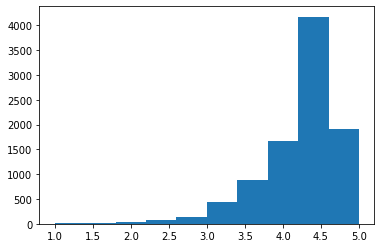

In [29]:
histoApple = plt.hist(google)

In [30]:
df['Permutation1'] = np.random.permutation(df['Rating'])

In [31]:
df['Permutation1']

0        4.1
1        4.5
2        4.1
3        4.4
4        4.5
        ... 
18032    3.9
18033    4.0
18034    4.5
18035    4.0
18036    4.5
Name: Permutation1, Length: 15634, dtype: float64

In [32]:
df

,Category,Rating,Reviews,Price,platform,Permutation1
0,ART_AND_DESIGN,4.1,159,0.00,google,4.1
1,ART_AND_DESIGN,3.9,967,0.00,google,4.5
2,ART_AND_DESIGN,4.7,87510,0.00,google,4.1
3,ART_AND_DESIGN,4.5,215644,0.00,google,4.4
4,ART_AND_DESIGN,4.3,967,0.00,google,4.5
...,...,...,...,...,...,...
18032,Games,4.5,142,0.00,apple,3.9
18033,Games,4.5,30,0.00,apple,4.0
18034,Utilities,4.5,15,1.99,apple,4.5
18035,Games,4.5,85,0.00,apple,4.0


In [33]:
df.groupby(by='platform')['Permutation1'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
apple,6268.0,4.120357,0.625788,1.0,4.0,4.3,4.5,5.0
google,9366.0,4.144469,0.604052,1.0,4.0,4.3,4.5,5.0


In [34]:
# Lets compare with the previous analytical summary:
df.groupby(by='platform')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
apple,6268.0,4.049697,0.726943,1.0,4.0,4.5,4.5,5.0
google,9366.0,4.191757,0.515219,1.0,4.0,4.3,4.5,5.0


In [35]:
# The difference in the means for Permutation1 (0.001103) now looks hugely different to our observed difference of 0.14206. 
# It's sure starting to look like our observed difference is significant, and that the Null is false; platform does impact on ratings
# But to be sure, let's create 10,000 permutations, calculate the mean ratings for Google and Apple apps and the difference between these for each one, and then take the average of all of these differences.
# Let's create a vector with the differences - that will be the distibution of the Null.

# First, make a list called difference.
difference=[]

# Now make a for loop that does the following 10,000 times:
# 1. makes a permutation of the 'Rating' as you did above
# 2. calculates the difference in the mean rating for apple and the mean rating for google. 
for i in range(10000):
    permutation = np.random.permutation(df['Rating'])
    difference.append(np.mean(permutation[df['platform']=='apple']) - np.mean(permutation[df['platform']=='google']))

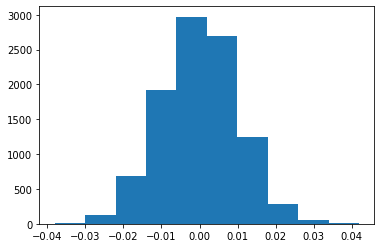

In [36]:
# Make a variable called 'histo', and assign to it the result of plotting a histogram of the difference list. 
histo= plt.hist(difference)

In [37]:
# Now make a variable called obs_difference, and assign it the result of the mean of our 'apple' variable and the mean of our 'google variable'
obs_difference = np.mean(apple) - np.mean(google)

# Make this difference absolute with the built-in abs() function. 
obs_difference = abs(obs_difference)

# Print out this value; it should be 0.1420605474512291. 
obs_difference

0.14206054745123442

In [38]:
'''
What do we know? 

Recall: The p-value of our observed data is just the proportion of the data given the null that's at least as extreme as that observed data.

As a result, we're going to count how many of the differences in our difference list are at least as extreme as our observed difference.

If less than or equal to 5% of them are, then we will reject the Null. 
'''
positiveExtremes = []
negativeExtremes = []
for i in range(len(difference)):
    if (difference[i] >= obs_difference):
        positiveExtremes.append(difference[i])
    elif (difference[i] <= -obs_difference):
        negativeExtremes.append(difference[i])

print(len(positiveExtremes))
print(len(negativeExtremes))

0
0
